

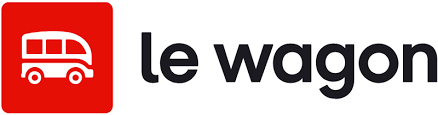



Quels sont les types d’erreurs que l’on peut trouver dans une table après la collecte de données ?

Après la collecte de data, on peut trouver plusieurs types d'erreurs dans une table comme les valeurs manquantes, des doublons, des erreurs de typographie, de format, présence des outliers, des erreurs de type de données ( texte dans des champs numériques), et des erreurs de référence (clés étrangères non valides).

Écrivez des exemples de requêtes SQL qui permettent de détecter ces erreurs.


```sql
SELECT *
FROM products
WHERE ProductName IS NULL;  -- Vérifie les valeurs manquantes (NULL)
```

```sql
SELECT *
FROM Customers
WHERE TRIM(Email) = '';  -- Recherche des emails vides
``` 




```sql
SELECT *
FROM products
WHERE NOT REGEXP_CONTAINS(LaunchDate, r'^\d{4}-\d{2}-\d{2}$'); -- verif format YYYY-MM-DD pour les dates

```


```sql
SELECT *
FROM customers
WHERE NOT REGEXP_CONTAINS(Email, r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$');  -- verifier format email
```

Comment faire pour ne pas avoir à lancer ces requêtes manuellement ?

On peut intégrer des pipelines ETL pour exécuter régulièrement des requêtes SQL qui vérifient la qualité des données après chaque chargement. Configurer des triggers dans la base de données pour déclencher automatiquement des vérifications après les opérations d'insertions, de update ou de suppressions

### Requête d'aggregation

Imaginez qu’il n’y a pas d’erreurs de données dans les tables.

En reprenant les trois tables `sales`, `products` et `customers`, écrivez une requête qui:
          

*   Joint les trois tables pour n’en créer qu’une seule
*   Agrège la donnée pour savoir combien chaque consommateur a acheté de chaque produit en affichant le nom du produit et le prénom du client.

          

Ecrivez votre requête ci-dessous.



```sql
SELECT c.ContactFirstName AS customer_first_name,
       p.ProductName,
       SUM(o.NumberOfUnits) AS total_units_acquired
FROM orders o
JOIN products p ON o.ProductID = p.ProductID
JOIN customers c ON o.CustomerID = c.CustomerID
GROUP BY c.ContactFirstName, p.ProductName
ORDER BY c.ContactFirstName, p.ProductName;


```

